# 5. Support Vector Machines

*Support Vector Machines (SVMs)* can perform linear/non-linear classification, regression, and outlier detection. They are particularly effective for classification of small-medium datasets.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Linear SVM Classification

**Large Margin Classification**
- Two classes (in $n$ dimensions) are *linearly separable*if there exists a straight line ($n-1$-dimensional affine hyperplane) separating them
- Imagine two equidistant parallel lines (hyperplanes) at distance $d$ on either side of the separating line (hyperplane); we call these the *marginns*
- An SVM classifier doing *large margin classification* finds the separating line (hyperplane) with maximum $d$ such that there are no training samples between the margins
- Note that the separating plane is determined by the points that intersect the margins - called *support vectors*
- The separating $n-1$-dimensional hyperplane is the intersection $h(\mathbf{x})=0$ of an $n$-dimensional hyperplane with the feature space and the margins are the hyperplanes $h(\mathbf{x})=\pm 1$
- SVMs are very sensitive to the scales of the features, so you must always use feature scaling
- Large margin only works if the data is linearly separable and even then is very sensitive to outliers

**Soft Margin Classification:** seeks to maximise the distance between margins while limiting (but not necessarily eliminating) *margin violations* (where an instance is on the wrong side of a margin)
- The hyperparameter $C>0$ controls how harshly margin violations are penalised, so smaller $C$ means more regularisation ($C\to\infty$ leads to large margin classification
- SVM classifiers do *not* generate class probabilities, just a prediction
- There are 3 options for linear SVM classifiers: in Scikit-Learn:
    - `LinearSVC`: specialised for linear SVM classifier and is particularly efficient
    - `SVC(kernel="linear")`: general SVM classifier - still scales well with features
    - `SGDClassifier(loss="hinge", alpha=1/(m*C))`: linear SVM classifier via stochastic gradient descent - doesn't converge as fast but allows out-of-core learning

In [2]:
from sklearn import datasets
from sklearn.utils import shuffle

# import iris sample data
iris = datasets.load_iris()

X = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
y = iris["target"]

# shuffle since data is ordered by class
X, y = shuffle(X, y)

# restrict to binary problem and 2 features
X_petal = X[
    ["petal length (cm)", "petal width (cm)"]
]
y_virg = (y == 2).astype(int)

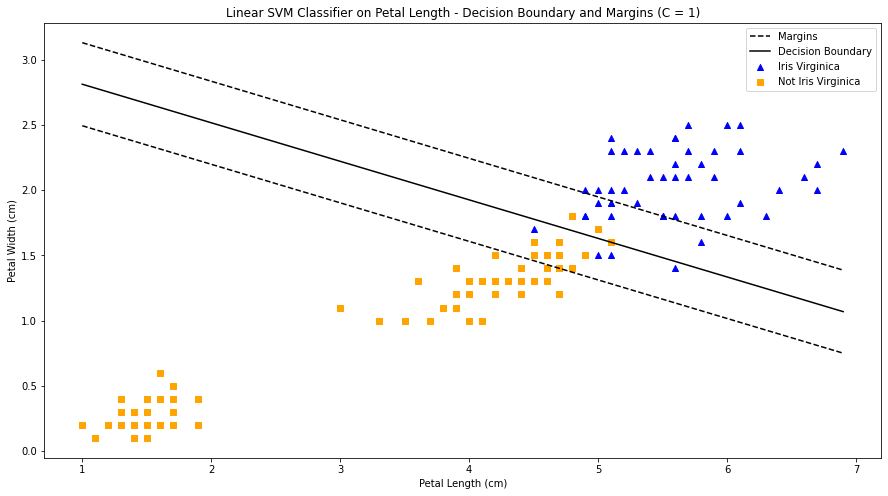

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LinearSVC(C=1, loss="hinge"))
pipe.fit(X_petal, y_virg)

def plot_decision_boundary():
    fig, ax = plt.subplots(figsize=(15, 8))

    def solve_linear_equation(intercept, coef, x, b=0):
        "Solve equation of the form intercept + coef[0]*x + coef[1]*y=b for y"
        y = b - coef[0] * x - intercept
        y /= coef[1]

        return y

    
    scaler = pipe[0]
    lin_svc = pipe[1]
    
    # decision function from SVM
    intercept = lin_svc.intercept_[0]
    coef = lin_svc.coef_[0]
    
    # want to plot intercept + coef[0]*x + coef[1]*y=b for b =-1, 0, 1
    # need to scale x_plot, solve equation for y, then unscale y
    x_plot = np.linspace(
        X_petal["petal length (cm)"].min(), X_petal["petal length (cm)"].max(), 100
    )
    x_plot_scaled = scaler.transform(
        np.c_[x_plot, np.zeros(len(x_plot))] # scaler required array size (*,2) so add a dummy col
    )[:, 0]
    
    for ix, b in enumerate([-1, 0, 1]):
        y_plot_scaled = solve_linear_equation(
            intercept,
            coef,
            x_plot_scaled,
            b
        )
        y_plot = scaler.inverse_transform(
            np.c_[np.zeros(len(y_plot_scaled)), y_plot_scaled]
        )[:, 1]
        
        if b == 0:
            ax.plot(x_plot, y_plot, color="k", ls="-", label="Decision Boundary")
        elif ix == 0:
            ax.plot(x_plot, y_plot, color="k", ls="--", label="Margins")
        else:
            ax.plot(x_plot, y_plot, color="k", ls="--")

    # data points
    ax.scatter(
        X_petal.loc[y_virg == 1, "petal length (cm)"],
        X_petal.loc[y_virg == 1, "petal width (cm)"],
        marker="^",
        color="blue",
        label="Iris Virginica",
    )
    ax.scatter(
        X_petal.loc[y_virg == 0, "petal length (cm)"],
        X_petal.loc[y_virg == 0, "petal width (cm)"],
        marker="s",
        color="orange",
        label="Not Iris Virginica",
    )

    ax.set_xlabel("Petal Length (cm)")
    ax.set_ylabel("Petal Width (cm)")

    ax.set_title("Linear SVM Classifier on Petal Length - Decision Boundary and Margins (C = {})".format(lin_svc.get_params()["C"]))

    ax.legend()


plot_decision_boundary()

More than 2 classes?